In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from PointTracking import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe

TODO: 
1) Test that the algorithm works when spontaneous vortices do not appear - maybe at Tfact = 1/10 but make sure new vortices appear or disappear 

Total Imag Time:  1.3346889019012451
kmax:  4.0212385965949355
T:  0.8085179925372403
(801, 128, 128)
(1, 128, 128)


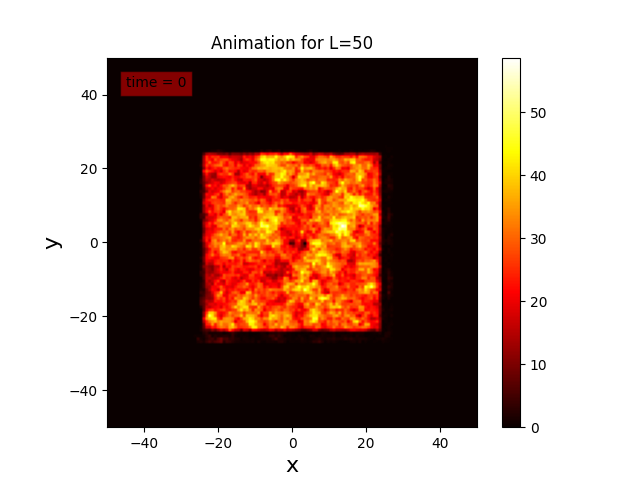

In [37]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 200000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 1/10, dst = False, vortex = True)

In [38]:
tracker = pt(g.snaps, g.dx, g.L) # initialize tracker object to track the vortices in each frame of snaps 

In [24]:
for point in tracker.points: 
    print(point.getCoors())

(25.390625, 30.859375)
(26.171875, 26.171875)
(24.609375, 24.609375)
(27.734375, 25.390625)


Text(0, 0.5, 'x')

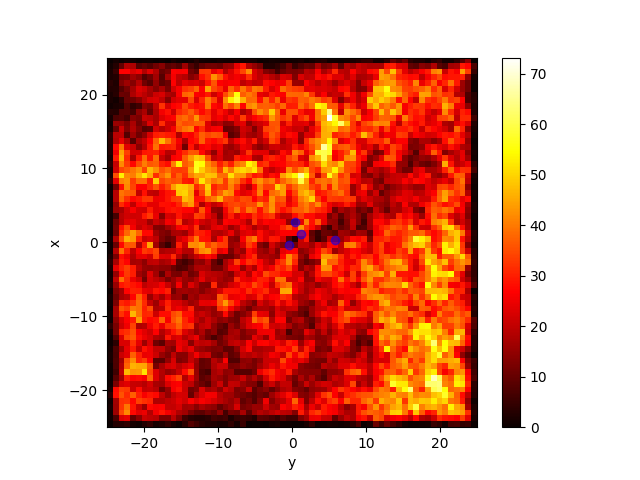

In [25]:
psi = g.snaps[0] 
L = g.L
dx = g.dx 
box = psi[int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)]
plt.figure() 
plt.imshow(np.abs(box)**2, cmap = plt.cm.hot, origin = 'lower', extent = [-L/2, L/2, -L/2, L/2])
plt.colorbar() 
for point in tracker.points: 
    plt.scatter(point.getCoors()[1]-L/2,point.getCoors()[0]-L/2, color = 'blue', alpha = 0.5)
plt.xlabel('y')
plt.ylabel('x')


### Test the tracking when a new vortex is detected 

In [26]:
print(np.shape(g.snaps))
snap = 8

(801, 128, 128)


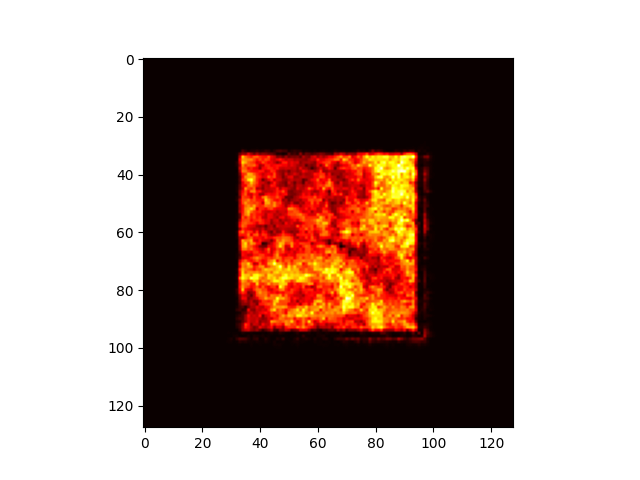

In [27]:
plt.figure() 
plt.imshow(np.abs(g.snaps[snap])**2, cmap = plt.cm.hot)
plt.show() 

In [28]:
for snapshot in g.snaps: 
    vortices, antivortices = pt.detectVortices(tracker, snapshot)
    if len(vortices) + len(antivortices) > 2: 
        print(snapshot) 
        break 

In [29]:
print(len(vortices) )
print(len(antivortices))

0
2


In [30]:
for i in range(len(g.snaps)): 
    vortices, antivortices = pt.detectVortices(tracker, g.snaps[i])
    if i%50 == 0: 
        
        print(i, " Vortices: ", vortices) 
        print(i, " AntiVortices: ", antivortices) 
    if len(vortices) + len(antivortices) > 2: 
        print("More vortices") 
    elif len(vortices) + len(antivortices) < 2: 
        print(i, " fewer vortices")

0  Vortices:  []
0  AntiVortices:  [[24.609375 24.609375]
 [27.734375 25.390625]]
50  Vortices:  []
50  AntiVortices:  [[25.390625 23.046875]
 [28.515625 26.171875]]
100  Vortices:  []
100  AntiVortices:  [[26.171875 22.265625]
 [29.296875 26.171875]]
150  Vortices:  []
150  AntiVortices:  [[25.390625 21.484375]
 [28.515625 26.171875]]
200  Vortices:  []
200  AntiVortices:  [[26.171875 20.703125]
 [26.953125 26.171875]]
250  Vortices:  []
250  AntiVortices:  [[25.390625 20.703125]
 [26.171875 26.171875]]
300  Vortices:  []
300  AntiVortices:  [[25.390625 20.703125]
 [23.828125 25.390625]]
350  Vortices:  []
350  AntiVortices:  [[24.609375 20.703125]
 [22.265625 25.390625]]
400  Vortices:  []
400  AntiVortices:  [[25.390625 21.484375]
 [20.703125 25.390625]]
450  Vortices:  []
450  AntiVortices:  [[24.609375 22.265625]
 [20.703125 25.390625]]
500  Vortices:  []
500  AntiVortices:  [[24.609375 23.046875]
 [19.921875 24.609375]]
550  Vortices:  []
550  AntiVortices:  [[19.140625 23.828125

In [31]:
# run the label vortices function to test 

pt.labelVortices(tracker) 

Fewer detected points
[]
[[24.609375 24.609375]
 [27.734375 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [27.734375 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [28.515625 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [28.515625 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [27.734375 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [27.734375 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [27.734375 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [27.734375 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [27.734375 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [28.515625 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [28.515625 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [28.515625 25.390625]]
Fewer detected points
[]
[[24.609375 24.609375]
 [28.515625 26.171875]]
Fewer detected points
[]
[[24.609375 24.609375]
 [28.515625 26.1

In [32]:
print(np.shape(tracker.psi_snaps))

(801, 128, 128)


In [33]:
print(np.shape(g.snaps))
print(np.shape(tracker.points[0].getTrajectory()))

(801, 128, 128)
(1041, 2)


In [34]:
print(np.shape(tracker.points))

(4,)


In [40]:
print(tracker.points[0].getTrajectory())
print(tracker.points[1].getTrajectory())

[[27.734375 24.609375]
 [27.734375 24.609375]
 [27.734375 24.609375]
 ...
 [23.046875 22.265625]
 [23.046875 22.265625]
 [23.046875 22.265625]]
[[24.609375 25.390625]
 [24.609375 25.390625]
 [24.609375 25.390625]
 ...
 [23.046875 22.265625]
 [23.046875 22.265625]
 [23.046875 22.265625]]


(2,)


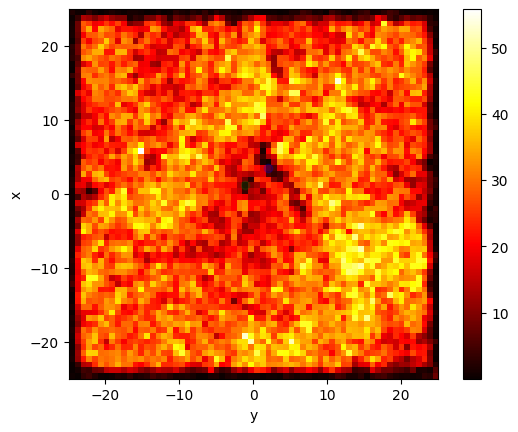

In [15]:
s = 150
print(np.shape(tracker.points))
v1_traj = tracker.points[0].getTrajectory()
v2_traj = tracker.points[1].getTrajectory()
box = g.snaps[s][int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)]
plt.figure() 
plt.imshow(np.abs(box)**2, cmap = plt.cm.hot, origin = 'lower', extent = [-L/2, L/2, -L/2, L/2])
plt.colorbar() 
plt.scatter(v1_traj[s][0]-L/2,v1_traj[s][1]-L/2, color = 'blue', alpha = 0.2)
plt.scatter(v2_traj[s][0]-L/2,v2_traj[s][1]-L/2, color = 'green', alpha = 0.2)

plt.xlabel('y')
plt.ylabel('x')

plt.show() 

In [16]:
print(v1_traj[0]+[1,1])
print(v2_traj[0]+[1,1])

[25.609375 25.609375]
[28.734375 26.390625]


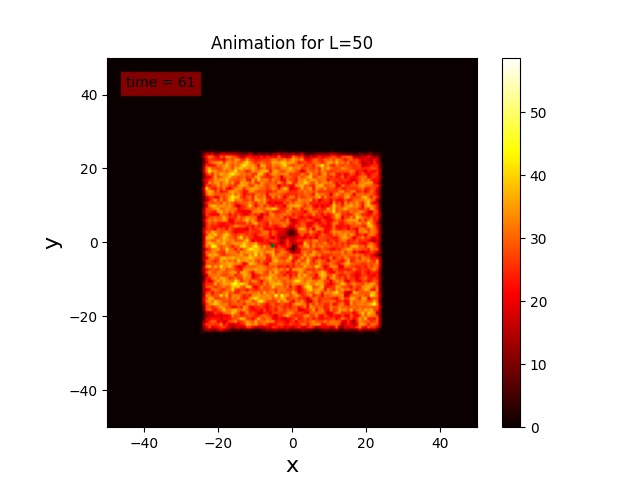

In [39]:
%matplotlib widget
filename = 'test'
path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
time_tracking = np.arange(0, len(g.snaps))*250*g.gpeobj.dt


fig, ax = plt.subplots() 
data = plt.imshow(np.abs(g.snaps[0])**2, extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = plt.cm.hot, origin = 'lower')


# set trajectories: 
v1_traj = tracker.points[0].getTrajectory()
v2_traj = tracker.points[1].getTrajectory()

v1 = plt.scatter(v1_traj[0][0]+0.5-L/2,v1_traj[0][1]+0.5-L/2, color = 'blue', alpha = 1, s = 3)
v2 = plt.scatter(v2_traj[0][0]+0.5-L/2,v2_traj[0][1]+0.5-L/2, color = 'green', alpha = 1, s = 3)

# plt.xlim(-5,5)
# plt.ylim(-5,5)

time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
time_text.set_text('time = 0')

plt.xlabel("x", fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.title(f'Animation for L={g.L}')
fig.colorbar(data)

def animate(i): 
    data.set_data(np.abs(g.snaps[i])**2)
    # fix these: 

    v1.set_offsets([v1_traj[i][0]+0.5-L/2,v1_traj[i][1]+0.5-L/2])
    v2.set_offsets([v2_traj[i][0]+0.5-L/2,v2_traj[i][1]+0.5-L/2])
    time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
    #return data, time_text
    return data
anim = animation.FuncAnimation(fig, animate, frames = len(g.snaps), blit = True)
anim.save(path)
plt.show()

#v1 = plt.scatter(g.xi[0][0][int((self.vortex_positions[0][0]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][1]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '<', s = 20, alpha = 0.6)
#v2 = plt.scatter(g.xi[0][0][int((self.vortex_positions[0][2]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][3]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '>', s = 20, alpha = 0.6)

In [ ]:
def animatepsi2d_vortex(self, filename, trajectories):
    if filename != None: 
        path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"

    fig, ax = plt.subplots() 
    data = plt.imshow(np.abs(self.snaps[0])**2, extent = [-self.winL/2, self.winL/2, -self.winL/2, self.winL/2],cmap = plt.cm.hot, origin = 'lower')

    if self.vortex: 
        v1 = plt.scatter(self.xi[0][0][int((self.vortex_positions[0][0]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][1]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '<', s = 20, alpha = 0.6)
        v2 = plt.scatter(self.xi[0][0][int((self.vortex_positions[0][2]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][3]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '>', s = 20, alpha = 0.6)
    
    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    
    # plt.contour(self.xi[0], self.xi[1], self.Vs)
    
    plt.title(f'Animation for L={self.L}')
    fig.colorbar(data)

    def animate(i): 
        data.set_data(np.abs(self.snaps[i])**2)
        # fix these: 
        if self.vortex: 
            v1.set_offsets([self.xi[0][0][int((self.vortex_positions[i][0]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[i][1]+1)/self.dx+self.winL/4/self.dx)]])
            v2.set_offsets([self.xi[0][0][int((self.vortex_positions[i][2]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[i][3]+1)/self.dx+self.winL/4/self.dx)]])
        time_text.set_text('time = %.1d' % self.time_tracking[i])
        #return data, time_text
        return data, time_text, v1, v2
    anim = animation.FuncAnimation(fig, animate, frames = len(self.snaps), blit = True)

    plt.show() 
    
    anim.save(path)

    return anim

In [12]:
snap = 120
vortices, antivortices = pt.detectVortices(tracker, g.snaps[snap])
print(vortices)
print(antivortices)

IndexError: index 120 is out of bounds for axis 0 with size 9

[23.828125 26.953125]
[26.953125 26.953125]


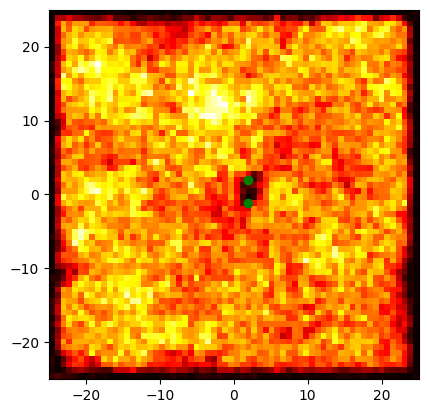

In [32]:
plt.figure() 
plt.imshow(np.abs(g.snaps[snap][int(g.L/2/g.dx):int(3*g.L/2/g.dx), int(g.L/2/g.dx):int(3*g.L/2/g.dx)])**2, cmap = plt.cm.hot, origin = 'lower', extent = [-g.L/2, g.L/2, -g.L/2, g.L/2])
for point in vortices: 
    plt.scatter(point[1]-L/2,point[0]-L/2, color = 'blue', alpha = 0.5)
for point in antivortices: 
    print(point) 
    plt.scatter(point[1]-L/2,point[0]-L/2, color = 'green')